<a href="https://colab.research.google.com/github/DhruvR-HWUD/DMML-Dubai-UG-Group-2/blob/Razin-Branch/Naive%20Bayes%20Model%20and%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
url = "https://raw.githubusercontent.com/DhruvR-HWUD/DMML-Dubai-UG-Group-2/refs/heads/Razin-Branch/Datasets/processed/tabular_data/brain_tumor_dataset.csv"
target_col = "Histology"


In [3]:
df = pd.read_csv(url)
X = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).values
le = LabelEncoder()
y = le.fit_transform(df[target_col].values)

In [4]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = GaussianNB().fit(X_tr, y_tr)
y_pred = model.predict(X_te)

print(f"Accuracy: {accuracy_score(y_te, y_pred):.3f}")
print(f"F1-macro: {f1_score(y_te, y_pred, average='macro'):.3f}")
print(f"F1-micro: {f1_score(y_te, y_pred, average='micro'):.3f}")
print("\nClassification Report:\n", classification_report(y_te, y_pred, target_names=le.classes_, zero_division=0))

Accuracy: 0.261
F1-macro: 0.248
F1-micro: 0.261

Classification Report:
                  precision    recall  f1-score   support

    Astrocytoma       0.27      0.17      0.21      1234
   Glioblastoma       0.26      0.46      0.34      1267
Medulloblastoma       0.26      0.24      0.25      1245
     Meningioma       0.25      0.17      0.20      1254

       accuracy                           0.26      5000
      macro avg       0.26      0.26      0.25      5000
   weighted avg       0.26      0.26      0.25      5000



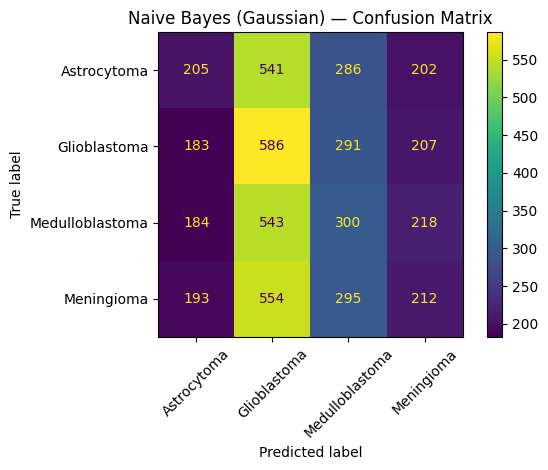

In [5]:
ConfusionMatrixDisplay.from_predictions(y_te, y_pred, display_labels=le.classes_, xticks_rotation=45)
plt.title("Naive Bayes (Gaussian) — Confusion Matrix")
plt.tight_layout(); plt.show()